<a href="https://colab.research.google.com/github/arpanastanley24/Machine-Learning-Projects/blob/main/Prediction_of_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION OF HEART FAILURE**

* Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.

* Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

* Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

* People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


## **ATTRIBUTE DESCRIPTION**

Age -> age of the patient
       [years]

Sex -> sex of the patient
       [M: Male,
        F: Female]

ChestPainType -> chest pain type
                 [TA: Typical Angina,
                  ATA: Atypical Angina,
                  NAP: Non-Anginal Pain,
                  ASY: Asymptomatic]

RestingBP -> resting blood pressure
             [mm Hg]

Cholesterol -> serum cholesterol
               [mm/dl]

FastingBS -> fasting blood sugar

             [1: if FastingBS > 120 mg/dl,
              0: otherwise]

RestingECG -> resting electrocardiogram results

              [Normal: Normal,
               ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
               LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR -> maximum heart rate achieved
         [Numeric value between 60 and 202]

ExerciseAngina -> exercise-induced angina

                  [Y: Yes,
                   N: No]

Oldpeak -> oldpeak = ST
           [Numeric value measured in depression]

ST_Slope -> the slope of the peak exercise ST segment

            [Up: upsloping,
              Flat: flat,
              Down: downsloping]

HeartDisease -> Presence of heart disease

                [1: heart disease,
                 0: Normal]


## **ACKNOWLEDGEMENT**

This dataset is taken from Kaggle

In [ ]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the dataset
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
#Retrieve the first 5 records
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Retrieve the last 5 records
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Rename a variable
df.rename(columns={'Sex': 'Gender'}, inplace=True)

In [ ]:
#Columns in the dataset
df.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [ ]:
#Size of the dataset
print("Size of Dataset: {} rows , {} columns".format(df.shape[0],df.shape[1]))

Size of Dataset: 918 rows , 12 columns


In [ ]:
#Count on each unique values in all the variables
df.nunique()

Age                50
Gender              2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
#Checking for null values
df.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

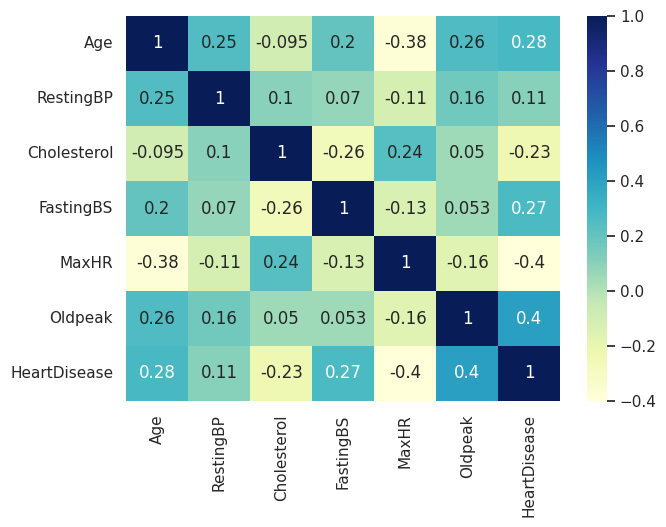

In [ ]:
# plot heatmap to check the correlation
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

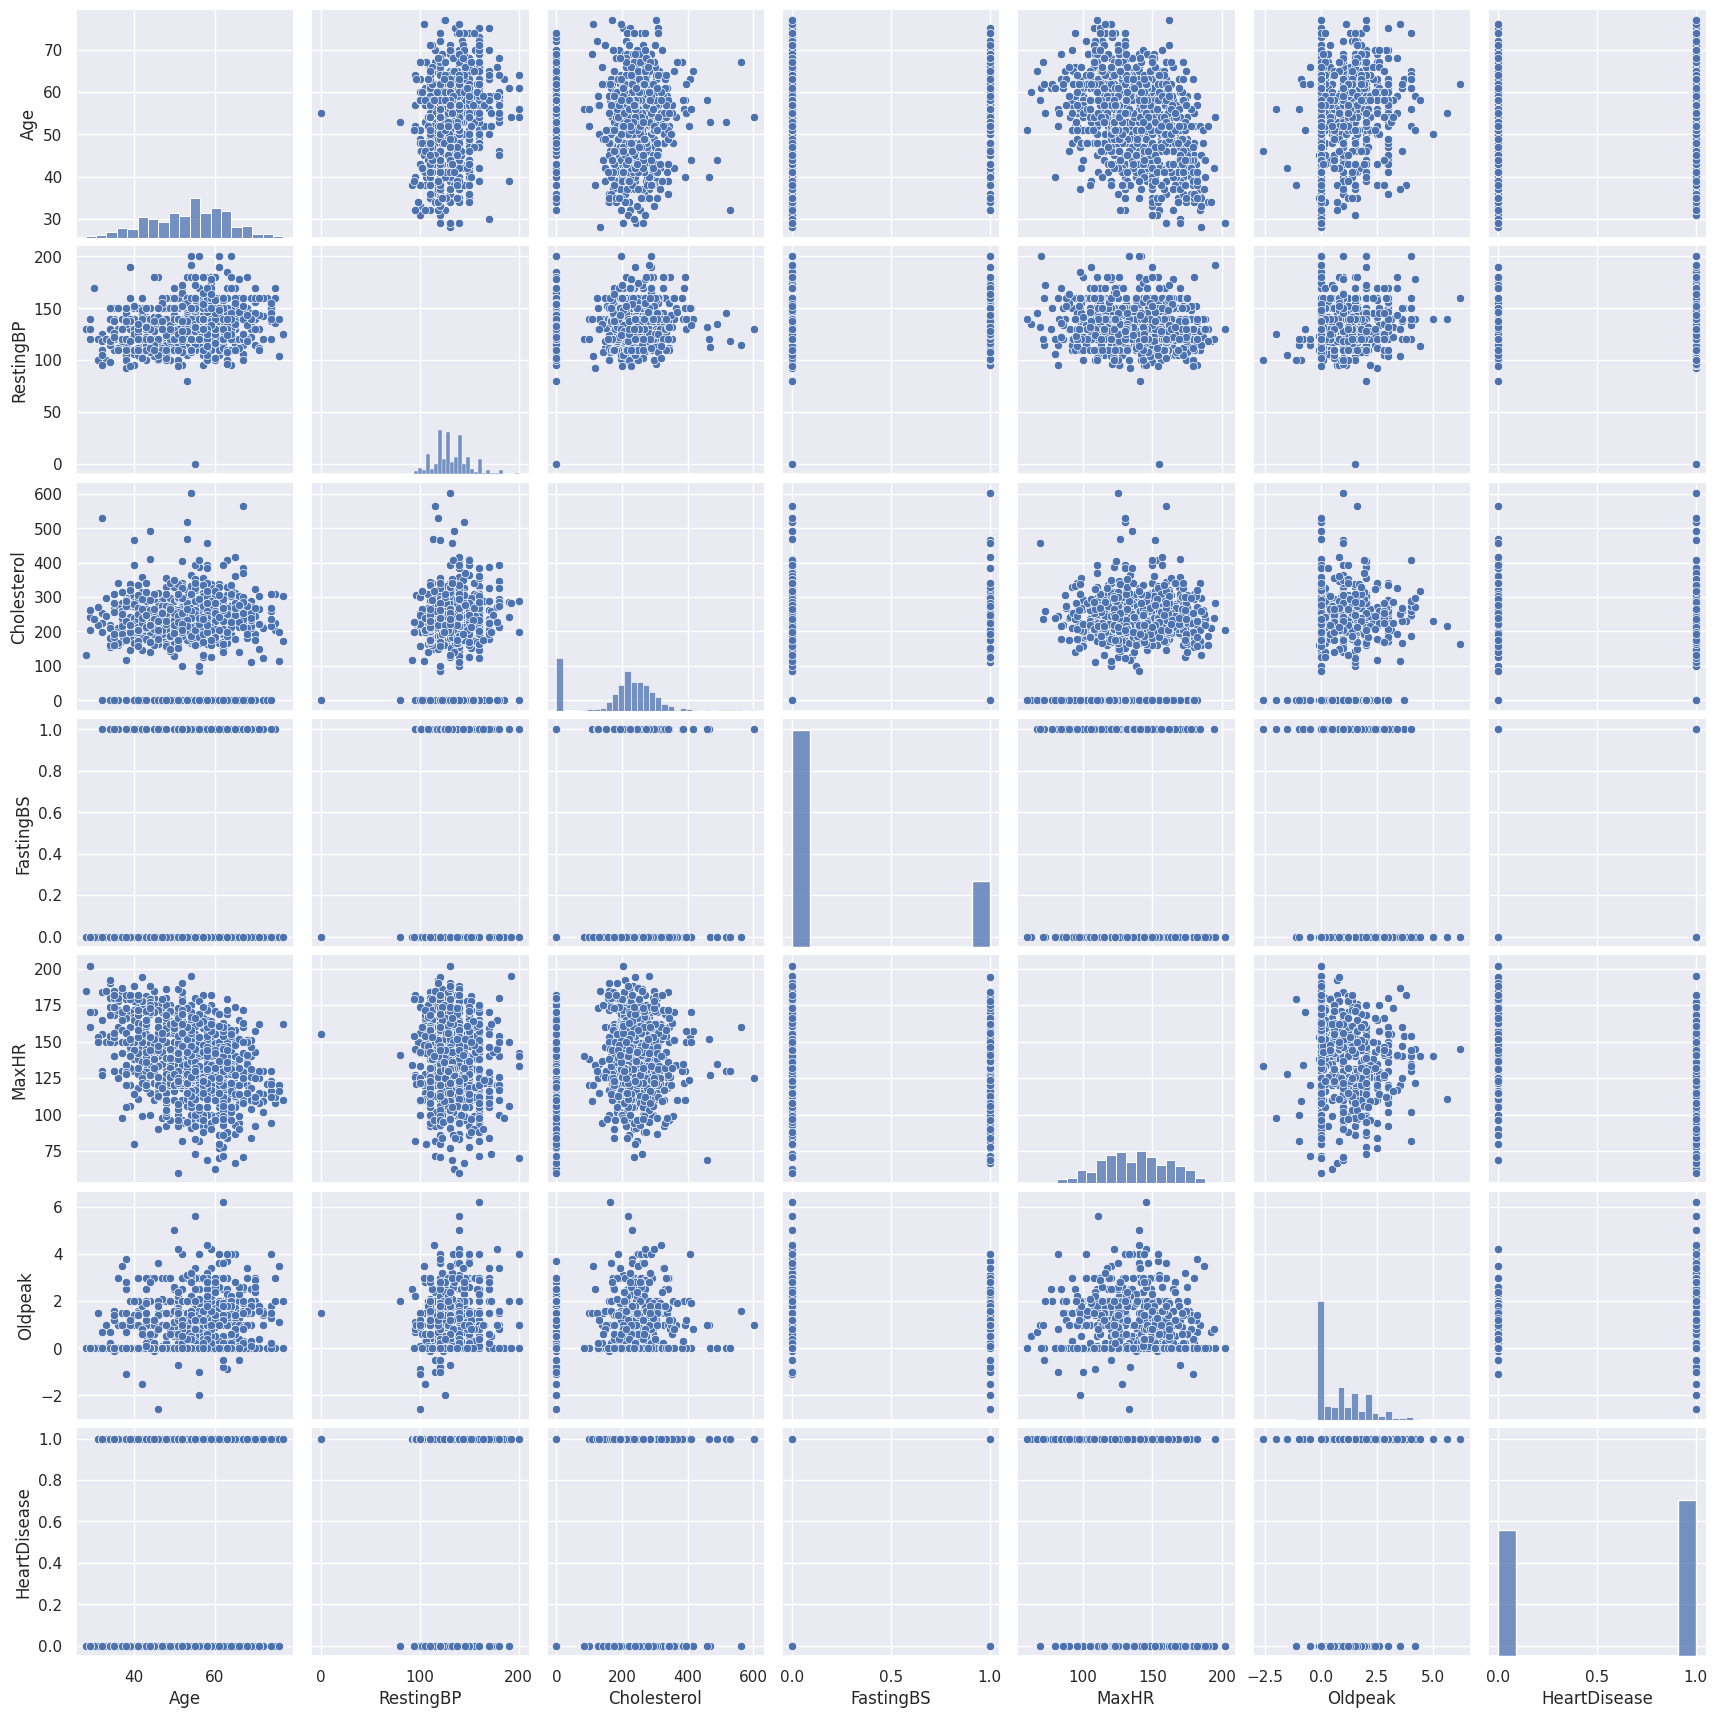

In [ ]:
#Plot the pairplot
sns.pairplot(df)

In [ ]:
#Summary measures
df.describe().T.style.background_gradient(cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
#Data types of all the variables
df.dtypes

Age                 int64
Gender             object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# **ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le=LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

# Print the updated dataframe
print(df)

     Age  Gender  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0     40       1              1        140          289          0   
1     49       0              2        160          180          0   
2     37       1              1        130          283          0   
3     48       0              0        138          214          0   
4     54       1              2        150          195          0   
..   ...     ...            ...        ...          ...        ...   
913   45       1              3        110          264          0   
914   68       1              0        144          193          1   
915   57       1              0        130          131          0   
916   57       0              1        130          236          0   
917   38       1              2        138          175          0   

     RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0             1    172               0      0.0         2             0  
1          

In [ ]:
#Choosing the independent variables
x=df.iloc[:,:-1]

In [ ]:
x.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope'],
      dtype='object')

In [ ]:
#Length of the columns in x
len(x.columns)

11

In [ ]:
#Choosing the Dependent variable
y = df.iloc[:, -1]
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
y.shape

(918,)

In [ ]:
#Summary measures
df.describe().T.style.background_gradient(cmap='cividis')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
Gender,918.000000,0.789760,0.407701,0.000000,1.000000,1.000000,1.000000,1.000000
ChestPainType,918.000000,0.781046,0.956519,0.000000,0.000000,0.000000,2.000000,3.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
RestingECG,918.000000,0.989107,0.631671,0.000000,1.000000,1.000000,1.000000,2.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
ExerciseAngina,918.000000,0.404139,0.490992,0.000000,0.000000,0.000000,1.000000,1.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [ ]:
#count of values under 'syndromic'
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

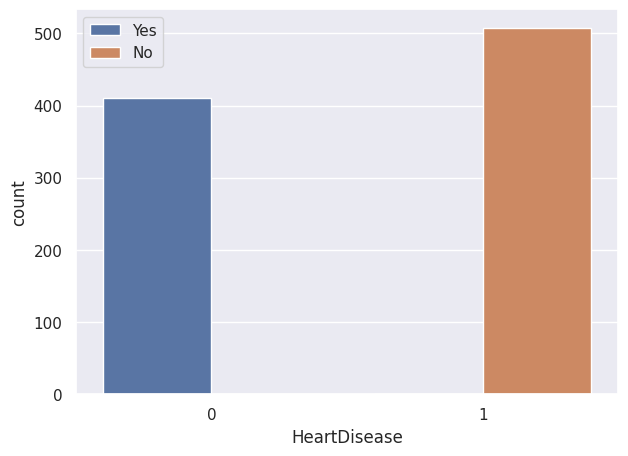

In [ ]:
#Pictorial Representation of two classes present in the dataset
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x ='HeartDisease', hue = "HeartDisease", data = df)

new_labels = ['Yes', 'No']

# Get the current legend
legend = plt.gca().legend()

# Update the legend labels
for text, label in zip(legend.get_texts(), new_labels):
    text.set_text(label)

# Show the updated plot
plt.show()

In [ ]:
x.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope'],
      dtype='object')

# **SPLITTING THE TRAIN AND TEST SETS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# **STANDARDISATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# **FEATURE SELECTION USING ANOVA TEST**

In [ ]:
# SelectKBest -- Select features according to the k highest scores.
# f_classif -- Compute the ANOVA F-value for the provided sample.
#F- Value - It is the ratio of two Chi-distributions divided by its degrees of Freedom
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=10)
z = select.fit_transform(x,y)

print("After selecting best 10 features:", z.shape)

After selecting best 10 features: (918, 10)


In [ ]:
New_features=select.get_feature_names_out()
list(New_features)

['Age',
 'Gender',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

# **MODEL BUILDING**

### **LOGISTIC REGRESSION**

* Logistic regression is used for solving the classification problems.

* It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc..

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

from sklearn.metrics import accuracy_score
ac_lr = accuracy_score(y_pred_lr, y_test)
print('The accuracy score for Logistic Regression is ',ac_lr)

The accuracy score for Logistic Regression is  0.8115942028985508


### **RANDOM FOREST CLASSIFIER**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)

from sklearn.metrics import accuracy_score
ac_rfc = accuracy_score(y_pred_rfc, y_test)
print('The accuracy score for Random Forest Classifier is ',ac_rfc)

The accuracy score for Random Forest Classifier is  0.8804347826086957


### **DECISION TREE CLASSIFIER**

* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)

from sklearn.metrics import accuracy_score
ac_dtc = accuracy_score(y_pred_dtc, y_test)
print('The accuracy score for Decision Tree Classifier is ',ac_dtc)

The accuracy score for Decision Tree Classifier is  0.8079710144927537


### **SUPPORT VECTOR CLASSIFIER**

* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

* SVM chooses the extreme points/vectors that help in creating the hyperplane.
* These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

from sklearn.metrics import accuracy_score
ac_svc = accuracy_score(y_pred_svc, y_test)
print('The accuracy score for LSupport Vector Classifier is ',ac_svc)

The accuracy score for LSupport Vector Classifier is  0.8478260869565217


### **K-NEAREST NEIGHBOR**

* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

from sklearn.metrics import accuracy_score
ac_knn = accuracy_score(y_pred_knn, y_test)
print('The accuracy score for K-Nearest Neighbor is ',ac_knn)

The accuracy score for K-Nearest Neighbor is  0.8405797101449275


# **PLOT FOR ACCURACY ON VARIOUS MACHINE LEARNING MODELS**

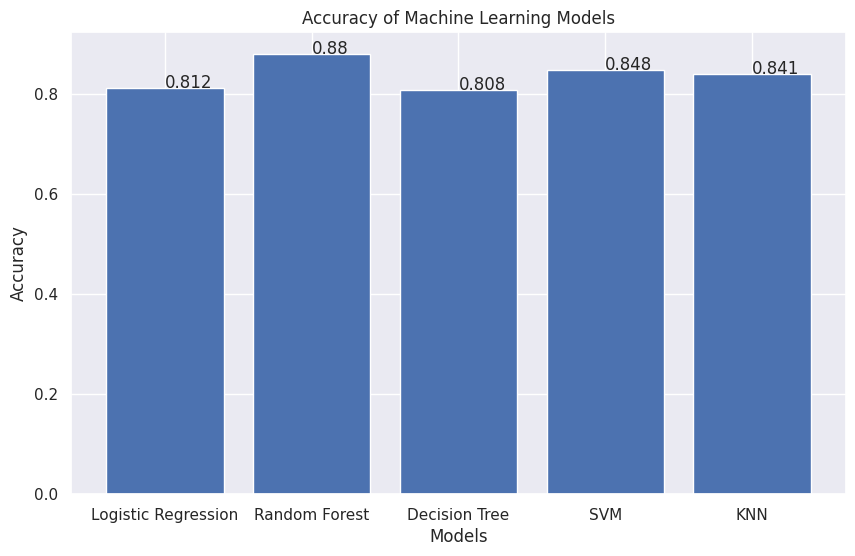

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']
accuracy = [0.812, 0.880, 0.808, 0.848, 0.841]

fig, ax = plt.subplots()
ax.bar(models, accuracy)

# Set the figure size
fig.set_size_inches(10, 6)  # Adjust the width and height as desired

for index, value in enumerate(accuracy):
    plt.text(index, value,
             str(value))

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Machine Learning Models')

# Display the plot
plt.show()

# **KFOLD CROSS VALIDATION FOR VARIOUS MACHINE LEARNING MODELS**

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier()
]

for model in models:
    scores = cross_val_score(model, x, y, cv=5)

    # Print the cross-validation scores for the current model
    print("Model:", type(model).__name__)
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy: {:.3f}".format(scores.mean()))
    print()

Model: LogisticRegression
Cross-Validation Scores: [0.81521739 0.80978261 0.80978261 0.81967213 0.77595628]
Mean Accuracy: 0.806

Model: RandomForestClassifier
Cross-Validation Scores: [0.875      0.82065217 0.83695652 0.82513661 0.74863388]
Mean Accuracy: 0.821

Model: DecisionTreeClassifier
Cross-Validation Scores: [0.77173913 0.77173913 0.77173913 0.75409836 0.66120219]
Mean Accuracy: 0.746

Model: SVC
Cross-Validation Scores: [0.60869565 0.78804348 0.69021739 0.71584699 0.61748634]
Mean Accuracy: 0.684

Model: KNeighborsClassifier
Cross-Validation Scores: [0.63586957 0.76630435 0.6576087  0.6284153  0.6284153 ]
Mean Accuracy: 0.663



# **PLOT FOR CROSS VALIDATION SCORE ON VARIOUS MACHINE LEARNING MODELS**

In [ ]:
import plotly.graph_objects as go

# Scores obtained from ML models
mean_accuracy = [0.806, 0.821, 0.746, 0.684, 0.663]

# Model names corresponding to the scores
model_names = ['Logistic regression', 'Random forest', 'Decision tree', 'SVC', 'KNN' ]

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=model_names, values=mean_accuracy)])

# Add a title
fig.update_layout(title='CROSS VALIDATION SCORE')

# Display the chart
fig.show()

# **COMPARISON OF ACCURACY AND AVERAGE OF CROSS VALIDATION SCORES ON VARIOUS MACHINE LEARNING MODELS**

In [ ]:
import plotly.graph_objects as go

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC', 'Kneighbors Classifier']
accuracy_scores = [0.812, 0.880, 0.808, 0.848, 0.841]
mean_cv_scores = [0.806, 0.821, 0.746, 0.684, 0.663]

# Create a bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=model_names, y=accuracy_scores, name='Accuracy'))
fig.add_trace(go.Bar(x=model_names, y=mean_cv_scores, name='Mean CV Score'))
fig.update_layout(xaxis_title='Model', yaxis_title='Score', title='Accuracy vs. Mean CV Score')
fig.update_traces(hovertemplate='Model: %{x}<br>Score: %{y}')
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

## Random Forest Classifier is the top performer

# **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced', {0: 0.3, 1: 0.7}]
}

# Initialize RandomForestClassifier
Classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(x_train, y_train)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")


Best parameters: {'class_weight': None, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.8754


# **FINAL MODEL**

In [ ]:
classifier = RandomForestClassifier(class_weight = None, max_depth = 5, max_features = 'log2', min_samples_split = 10, n_estimators = 50)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# **EVALUATION METRICS**

Accuracy score :  0.8731884057971014
precision score :  0.8731884057971014
recall score :  0.8731884057971014
f1 score :  0.8731884057971014

classification report 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       133
           1       0.88      0.87      0.88       143

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



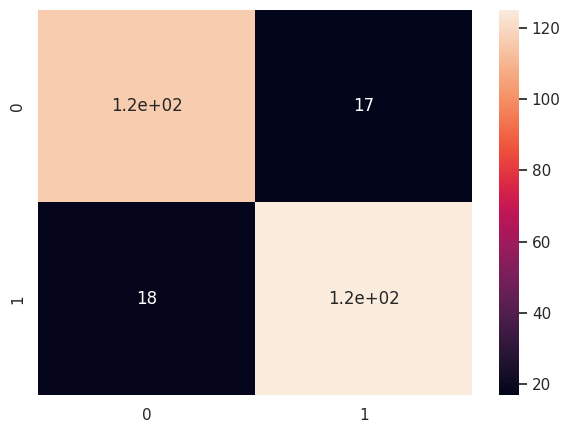

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test,average='micro'))
print("recall score : ",recall_score(y_pred,y_test,average='micro'))
print("f1 score : ",f1_score(y_pred,y_test,average='micro'))
print("\nclassification report \n")
print(classification_report(y_pred, y_test))
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True)
plt.show()

### **RANKING THE FEATURES BASED ON ITS IMPORTANCE**

           Feature  Importance
10        ST_Slope    0.211342
2    ChestPainType    0.131839
7            MaxHR    0.112991
4      Cholesterol    0.109106
9          Oldpeak    0.097543
8   ExerciseAngina    0.092398
0              Age    0.083176
3        RestingBP    0.075182
1           Gender    0.031651
5        FastingBS    0.027731
6       RestingECG    0.027042


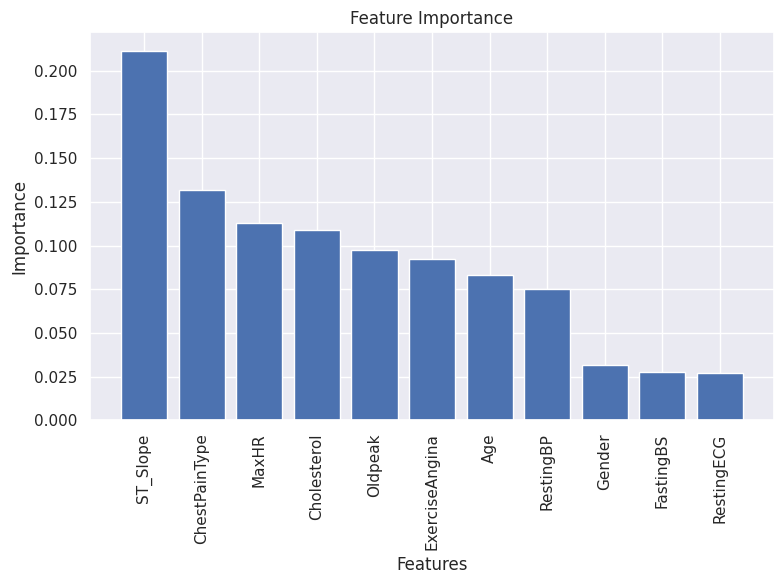

In [ ]:
# Create a random forest classifier
rfc = RandomForestClassifier()

# Fit the classifier to the data
rfc.fit(x, y)

# Get feature importances
importances = rfc.feature_importances_

# Create a DataFrame to store feature importance information
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': importances})

# Sort the features based on their importance
sorted_features = feature_importance.sort_values(by='Importance', ascending=False)

# Print the important features in order
print(sorted_features)

# Plot the feature importances using a barplot
plt.figure(figsize=(8, 6))
plt.bar(sorted_features['Feature'], sorted_features['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### **INFERENCE**

* 'ST_Slope' is the most important feature in the dataset which is the slope of the peak exercise ST segment

* Random Forest Classifier performs 87% of accuracy after tuning the parameters